# MLClass. "Прикладной анализ данных". Курс "Машинное обучение с помощью Python".
<img src="../img/mlclass_logo.jpg" height="240" width="240">
## Авторы материала: преподаватель ФКН НИУ ВШЭ Кашницкий Юрий, магистрант ВМК МГУ Евгений Колмаков
Материал распространяется на условиях лицензии <a href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-Share Alike 4.0</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

## XGBoost

Выделяют три группы параметров:
- Общие параметры, отвечающие за базовый алгоритм для бустинга и распараллеливание.
- Параметры выбранного базового алгоритма.
- Параметры обучения, отвечающие за функцию потерь и метрику качества на валидации.

**1. Общие параметры:**
- booster [default=gbtree] - тип базового алгоритма для бустинга: дерево решений gbtree или линейная модель gblinear. 
- silent [default=0] - выдавать (silent=0) или нет (silent=1) сообщения по ходу работы алгоритма.
- nthread [default to maximum number of threads available if not set] - число нитей доступных для параллельной работы xgboost.

**2. Параметры базового алгоритма:**

**2.1. Дерево решений:**
- eta [default=0.3] - темп обучения, перед добавлением дерева в композицию оно умножается на eta. Используется для предотвращения переобучения за счёт "сокращения" весов базовых алгоритмов, делая модель более консервативной. Чем меньше eta, тем больше нужно итераций num_boost_round для обучения модели с хорошим качеством. Диапазон: [0, 1]
- gamma [default=0] - минимальное снижение значения функции потерь, необходимое для дальнейшего разбиения вершины дерева. Большие значения gamma > 0 приводят к более консервативным моделям. Диапазон: [0, $\infty$).
- max_depth [default=6] - максимальная глубина дерева. Диапазон: [1, $\infty$). 
- min_child_weight [default=1] - минимальное необходимое (взвешенное) число примеров в каждой вершине. Чем больше, тем более консервативна итоговая модель. Диапазон: [0, $\infty$).
- max_delta_step [default=0] - обычно равен нулю. Положительные значения используются при несбалансированных классах для ускорения сходимости. Диапазон [0, $\infty$).
- subsample [default=1] - доля выборки, используемая для обучения каждого дерева. Если subsample < 1, то выбирается случайная подвыборка, что помогает в борьбе с переобучением. Диапазон: (0, 1]
- colsample_bytree [default=1] - доля признаков, используемая для обучения каждого дерева. Диапазон: (0, 1]
- lambda [default=1] - коэффициент перед $L_2$-регуляризатором в функции потерь.
- alpha [default=0] - коэффициент перед $L_1$-регуляризатором в функции потерь.

**2.2. Линейная модель:**
- lambda [default=0] - коэффициент перед $L_2$-регуляризатором вектора весов в функции потерь.
- alpha [default=0] - коэффициент перед $L_1$-регуляризатором вектора весов в функции потерь.
- lambda_bias [default=0] - коэффициент перед $L_2$-регуляризатором смещения (свободного члена) в функции потерь.

**3. Параметры задачи обучения:**
- objective [default=reg:linear] - используемая при обучении функция потерь:
    - "reg:linear" – линейная регрессия.
    - "reg:logistic" – логистическая регрессия.
    - "binary:logistic" – логистическая регрессия для бинарной классификации, на выходе - вероятность.
    - "binary:logitraw" – то же самое, но на выходе - значение до его преобразования логистической функцией.
    - "count:poisson" – регрессия Пуассона (используется для оценки числа каких-то событий, счётный признак), на выходе - матожидания распределения Пуассона. В этом случае max_delta_step автоматически устанавливается равным 0.7.
    - "multi:softmax" – обобщение логистической регрессии на многоклассовый случай. При этом нужно задать параметр num_class.
    - "multi:softprob" – то же самое, но на выходе - вектор размера ndata * nclass, который можно преобразовать в матрицу, содержащую вероятности отнесения данного объекта к данному классу.
    - "rank:pairwise" – используется для задач ранжирования.
- base_score [default=0.5] - инициализация значения модели для всех примеров, глобальное смещение.
- eval_metric [default according to objective] - метрика качества на валидационной выборке (по умолчанию соответствует функции потерь: rmse - для регрессии, error - для классификации, mean average precision - для ранжирования). Выбрать можно одну из следующих метрик:
    - "rmse": root mean square error.
    - "logloss": минус логарифм правдоподобия.
    - "error": доля ошибок для бинарной классификации.
    - "merror": то же самое для многоклассовой классификации.
    - "mlogloss": logloss для многоклассовой классификации.
    - "auc": AUC.
    - "ndcg": Normalized Discounted Cumulative Gain.
    - "map": Mean average precision.
    - "ndcg@n",”map@n”: здесь n - целое число, первые n позиций в списке не учитываются.
    - "ndcg-",”map-”,”ndcg@n-”,”map@n-”: списку из всех положительных примеров будет присвоено значение 0 (вместо 1).
- seed [default=0] - для воспроизводимости "случайности".

**Параметры в xgboost.train**:
- params (dict) – параметры, описанные выше.
- dtrain (DMatrix) – обучающая выборка.
- num_boost_round (int) – число итераций бустинга.
- evals (list) – список для оценки качества во время обучения.
- obj (function) – собственная функция потерь.
- feval (function) – собственная функция для оценки качества.
- maximize (bool) – нужно ли максимизировать feval.
- early_stopping_rounds (int) – активирует early stopping. Ошибка на валидации должна уменьшаться каждые early_stopping_rounds итераций для продолжения обучения. Список evals должен быть не пуст. Возвращается модель с последней итерации. Если произошел ранний останов, то модель будет содержать поля: bst.best_score и bst.best_iteration.
- evals_result (dict) – результаты оценки качества.
- verbose_eval (bool) – вывод значения метрики качества на каждой итерации бустинга.
- learning_rates (list or function) – коэффициент скорости обучения для каждой итерации - list l: eta = l[boosting round] - function f: eta = f(boosting round, num_boost_round).
- xgb_model (file name of stored xgb model or ‘Booster’ instance) – возможность продолжить обучения имеющейся модели XGB.



## sklearn.ensemble.GradientBoostingClassifier
- loss [default="deviance"] - оптимизируемая функция потерь.  Одна из {"deviance", "exponential"}. Первая соответствует логистической регрессии и возвращает вероятности, вторая - AdaBoost.
- learning_rate [default=0.1] - темп обучения, аналогично eta для XGBoost.
- n_estimators [default=100] - число итераций градиентного бустинга.
- max_depth [default=3] - аналогично max_depth для XGBoost.
- min_samples_split [default=2] - минимальное число примеров, необходимое для разветвления в данной вершине,  аналогично min_child_weight для XGBoost.
- min_samples_leaf [default=1] - минимальное число примеров в листе.
- min_weight_fraction_leaf [default=0.0] - минимальное взвешенное число примеров в листе.
- subsample [default=1.0] - аналогично subsample для XGBoost.
- max_features (int, float, string or None) [default=None] - число (или доля) признаков, используемых при разбиении вершины.
    - "auto", тогда max_features=sqrt(n_features).
    - "sqrt", тогда max_features=sqrt(n_features).
    - "log2", тогда max_features=log2(n_features).
    - None, тогда max_features=n_features.
- max_leaf_nodes [default=None]
- init (BaseEstimator or None) [default=None] - алгоритм для начальных предсказаний.
- verbose [default=0] - аналогично silent для XGBoost.
- warm_start [default=False] - если True, используется ансамбль с предыдущего вызова fit, новые алгоритмы добавляются к нему, иначе строится новый алгоритм.

## Сравнение алгоритмов по времени работы

Посмотрим на время обучения классификаторов XGBooster и GradientBoostingClassifier. Для этого будем генерировать выборку из 1000 объектов и 50 признаков с помощью sklearn.datasets.make_classification и замерять время обучения.

In [1]:
import time
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

xgb_params1 = {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.1, 
    'silent': 1, 'objective': 'binary:logistic', 'nthread': 1}
xgb_params2 = {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.1, 
    'silent': 1, 'objective': 'binary:logistic', 'nthread': 4}
sklearn_params = {'n_estimators': 100, 'max_depth': 3}

xgb_time1 = list()
xgb_time2 = list()
sklearn_time = list()

n_runs = 50

for i in range(n_runs):
    # Generating dataset
    X, y = make_classification(n_samples=1000, n_features=50, n_informative=20)
    # Training XGBooster (nthread=1)
    t = time.time()
    bst = xgb.train(xgb_params1, xgb.DMatrix(X, label=y), num_boost_round=100)
    elapsed = time.time() - t
    xgb_time1.append(elapsed)
    # Training XGBooster (nthread=4)
    t = time.time()
    bst = xgb.train(xgb_params2, xgb.DMatrix(X, label=y), num_boost_round=100)
    elapsed = time.time() - t
    xgb_time2.append(elapsed)
    # Training GradientBoostingClassifier
    t = time.time()
    clf = GradientBoostingClassifier(**sklearn_params).fit(X, y)
    elapsed = time.time() - t
    sklearn_time.append(elapsed)

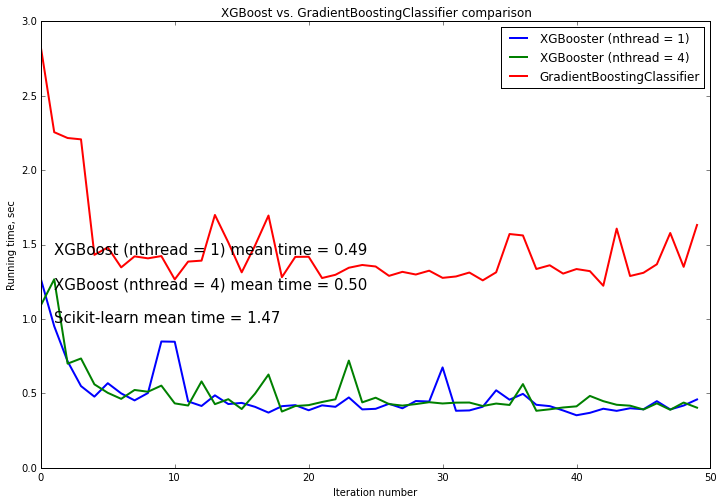

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

xgb_mean1 = sum(xgb_time1) / n_runs
xgb_mean2 = sum(xgb_time2) / n_runs
sklearn_mean = sum(sklearn_time) / n_runs

plt.figure(figsize=(12, 8))
plt.plot(xgb_time1, label='XGBooster (nthread = 1)', lw=2)
plt.plot(xgb_time2, label='XGBooster (nthread = 4)', lw=2)
plt.plot(sklearn_time, label='GradientBoostingClassifier', lw=2)
plt.legend(loc='best')
plt.text(1, (xgb_mean1 + sklearn_mean) / 2, 
         'XGBoost (nthread = 1) mean time = %.2f' % xgb_mean1 +
         '\n\nXGBoost (nthread = 4) mean time = %.2f' % xgb_mean2 +
         '\n\nScikit-learn mean time = %.2f' % sklearn_mean,
            fontsize = 15)
plt.xlabel('Iteration number')
plt.ylabel('Running time, sec')
plt.title('XGBoost vs. GradientBoostingClassifier comparison')
plt.show()

## Выводы

Основные преимущества XGBoost по сравнению с sklearn.ensembles.GradientBoostingClassifier:
- Помимо деревьев возможно использование линейных моделей в качестве базовых классификаторов.
- Скорость работы.
- Возможность распараллеливания.
- Значительно больший выбор стандартных функций потерь, а также возможность задавать свою функцию потерь.
- Наличие регуляризаторов в итоговой функции потерь и возможность задавать их коэффициенты, что даёт еще один метод борьбы с переобучением, помимо использования случайности (subsample, colsample_bytree) и основных параметров дерева решений.
- Встроенная обработка missing values.

## Полезные ссылки
- [XGBoost](https://xgboost.readthedocs.org/en/latest/parameter.html)
- [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- [Сравнение](https://github.com/szilard/benchm-ml) различных библиотек для машинного обучения, в том числе sklearn и xgboost 